<a href="https://colab.research.google.com/github/aqu7he/DS-4002-Group-5-Project-2/blob/main/tripleexpsmoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import statsmodels.api as sm

filepath = r'/content/seaice_data.csv'
seaice = pd.read_csv(filepath)
seaice.head()

,Extent_north,Datetime,Extent_south,Extent_total
0,10.231,1978-10-26,17.624,27.855
1,10.420,1978-10-28,17.803,28.223
2,10.557,1978-10-30,17.670,28.227
3,10.670,1978-11-01,17.527,28.197
4,10.777,1978-11-03,17.486,28.263


In [35]:
seaice['date'] = pd.to_datetime(seaice['Datetime'])
seaice.drop(columns=['Datetime'])

,Extent_north,Extent_south,Extent_total,date
0,10.231,17.624,27.855,1978-10-26
1,10.420,17.803,28.223,1978-10-28
2,10.557,17.670,28.227,1978-10-30
3,10.670,17.527,28.197,1978-11-01
4,10.777,17.486,28.263,1978-11-03
...,...,...,...,...
14918,14.784,2.809,17.593,2024-03-07
14919,14.828,2.873,17.701,2024-03-08
14920,14.879,2.924,17.803,2024-03-09
14921,14.968,2.985,17.953,2024-03-10


In [36]:
seaice.set_index('date', inplace=True)

monthly_means = seaice.resample('M').mean()
print(monthly_means)

            Extent_north  Extent_south  Extent_total
date                                                
1978-10-31     10.402667     17.699000     28.101667
1978-11-30     11.645133     15.896400     27.541533
1978-12-31     13.667063     10.395250     24.062313
1979-01-31     15.414000      5.402200     20.816200
1979-02-28     16.175286      3.141071     19.316357
...                  ...           ...           ...
2023-11-30      9.659367     14.272467     23.931833
2023-12-31     12.003000      8.667903     20.670903
2024-01-31     13.916419      3.961452     17.877871
2024-02-29     14.606655      2.141690     16.748345
2024-03-31     14.827545      2.716364     17.543909

[546 rows x 3 columns]


<ipython-input-36-277e2d2261ea>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_means = seaice.resample('M').mean()


In [37]:
import numpy as np         # for mathematical calculations
from sklearn.metrics import mean_absolute_error # for evaluating models
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [38]:
# set up train/test split to see reliability of model
# first let's use only 'Extent_total'
seaice_1 = monthly_means.drop(columns=['Extent_north','Extent_south'])
print(seaice_1)

            Extent_total
date                    
1978-10-31     28.101667
1978-11-30     27.541533
1978-12-31     24.062313
1979-01-31     20.816200
1979-02-28     19.316357
...                  ...
2023-11-30     23.931833
2023-12-31     20.670903
2024-01-31     17.877871
2024-02-29     16.748345
2024-03-31     17.543909

[546 rows x 1 columns]


In [39]:
train = seaice_1[:'2022-03-31']
print(len(train))
test = seaice_1['2022-04-30':]
print(len(test))



522
24


In [51]:
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)

fit_model = model.fit()
print("Fitted smoothing parameters:")
print("Smoothing level:", fit_model.params['smoothing_level'])
print("Smoothing trend:", fit_model.params['smoothing_trend'])
print("Smoothing seasonal:", fit_model.params['smoothing_seasonal'])
print("Initial level:", fit_model.params['initial_level'])
print("Initial trend:", fit_model.params['initial_trend'])
print("Initial seasonal:", fit_model.params['initial_seasons'])

Fitted smoothing parameters:
Smoothing level: 0.9835604316168166
Smoothing trend: 0.0
Smoothing seasonal: 3.95037314038817e-12
Initial level: 24.977697710631315
Initial trend: -0.007368860444645602
Initial seasonal: [ 3.11828332  3.34137001  0.11988885 -3.75479514 -4.79354177 -3.67463748
 -1.57888435  0.33822731  1.98137307  2.1760636   1.65040672  1.6156858 ]


In [52]:
y_pred = fit_model.forecast(24)

In [53]:
from sklearn.metrics import mean_absolute_error

# Assuming y_true is your true target values in the training test set

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, y_pred)
print(mae)

0.5578904218154236


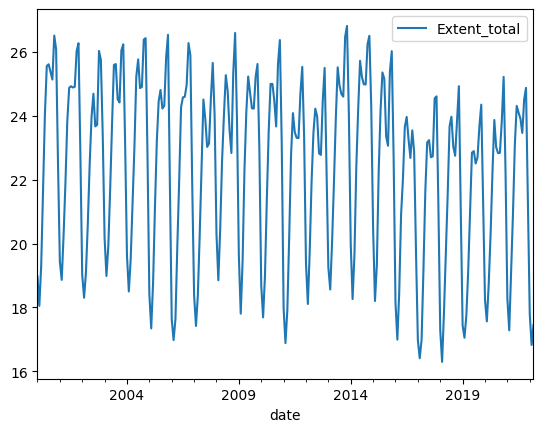

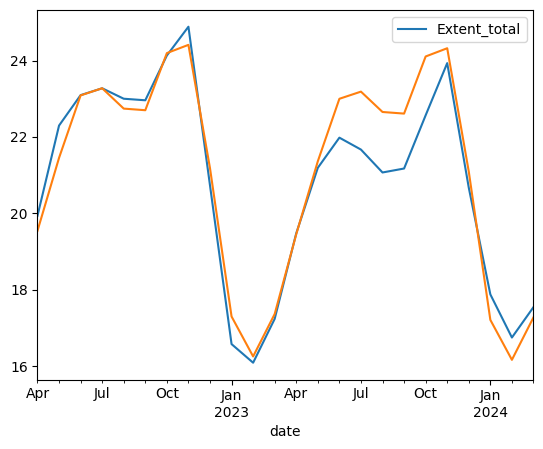

In [54]:
import matplotlib.pyplot as plt
train['2000':].plot()
test.plot()
y_pred.plot()
plt.show()

In [56]:
y_pred = fit_model.forecast(72)


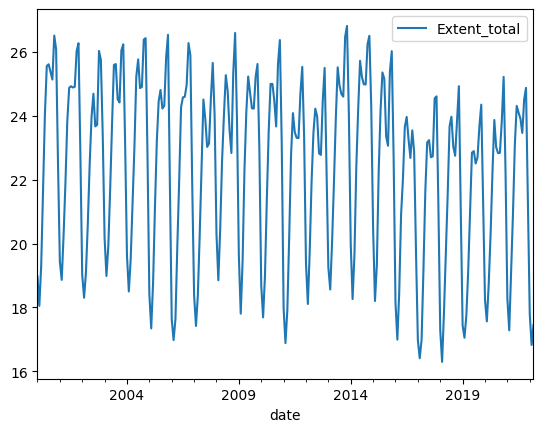

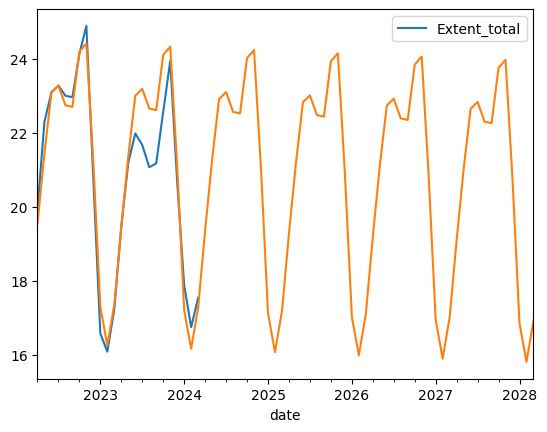

In [57]:
# show example model

train['2000':].plot()
test.plot()
y_pred.plot()
plt.show()

In [ ]:
# quite frankly I don't know what conclusions we should draw here. Any thoughts?